# Distributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context('talk')
plt.rcParams['figure.figsize'] = [10,6]

In [2]:
# !pip install kaggle

In [3]:
## download kaggle dataset using kaggle api
# employee annual salary: https://www.kaggle.com/datasets/dsfelix/employees-annual-salary-in-chicago
!kaggle datasets download -d dsfelix/employees-annual-salary-in-chicago
!ls -a

employees-annual-salary-in-chicago.zip: Skipping, found more recently modified local copy (use --force to force download)
.                                      LICENSE
..                                     README.md
.git                                   Wk 15 Lect 01 -  Distributions.ipynb
.gitattributes                         employees-annual-salary-in-chicago.zip
.gitignore                             salary.csv
.ipynb_checkpoints


In [4]:
# input('testing')

In [5]:
## unzip the downloaded dataset
!unzip employees-annual-salary-in-chicago.zip

Archive:  employees-annual-salary-in-chicago.zip
replace salary.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [6]:
## load data as df
df = pd.read_csv('salary.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31101 entries, 0 to 31100
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               31101 non-null  object 
 1   Job Titles         31101 non-null  object 
 2   Department         31101 non-null  object 
 3   Full or Part-Time  31101 non-null  object 
 4   Salary or Hourly   31101 non-null  object 
 5   Typical Hours      6814 non-null   float64
 6   Annual Salary      24287 non-null  float64
 7   Hourly Rate        6814 non-null   float64
dtypes: float64(3), object(5)
memory usage: 1.9+ MB


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
3,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,45.9
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN
...,...,...,...,...,...,...,...,...
31096,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,90990.0,NaN
31097,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,95586.0,NaN
31098,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,102372.0,NaN
31099,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,109236.0,NaN


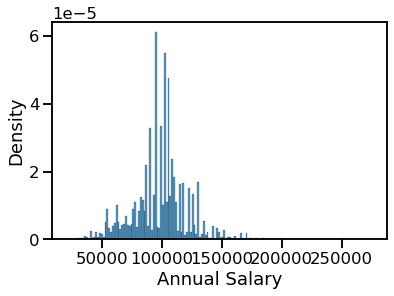

In [7]:
ax = sns.histplot(data=df, x='Annual Salary',stat='density')

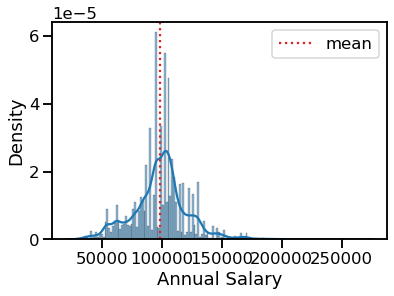

In [8]:
ax = sns.histplot(data=df, x='Annual Salary',stat='density', kde=True)
ax.axvline(df['Annual Salary'].mean(), label="mean", color='tab:red',ls=':')
ax.legend();

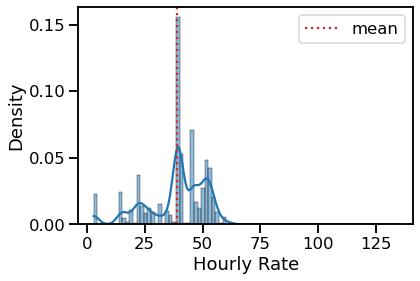

In [9]:
col = 'Hourly Rate'
ax = sns.histplot(data=df, x=col,stat='density', kde=True)
ax.axvline(df[col].mean(), label="mean", color='tab:red',ls=':')
ax.legend();

In [10]:
# !pip install cdds

In [11]:
from cdds.imports import *

cdds v0.1.2 loaded.


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/cdds/imports.py:120: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  dfs = df_imports.style.hide_index().set_caption('Loaded Packages & Info')


Package,Handle,Version,Documentation,Imported
pandas,pd,1.4.2,https://pandas.pydata.org/docs/,Y
cdds,ds,0.1.2,Coming Soon!,Y
numpy,np,1.22.4,https://numpy.org/doc/stable/reference/,Y
matplotlib,mpl,3.5.2,https://matplotlib.org/stable/api/index.html,Y
matplotlib.pyplot,plt,,https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot,Y
seaborn,sns,0.11.2,https://seaborn.pydata.org/api.html,Y
IPython.display,dp,,https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html,Y
sklearn,,1.1.1,,N


In [12]:
df = ds.datasets.load_height_weight()
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


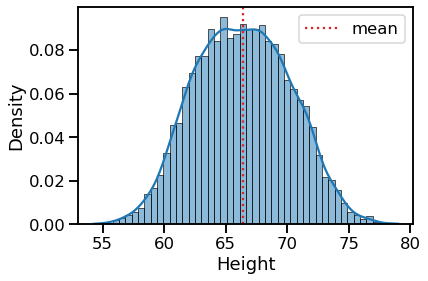

In [13]:
col = 'Height'
ax = sns.histplot(data=df, x=col,stat='density', kde=True)
ax.axvline(df[col].mean(), label="mean", color='tab:red',ls=':')
ax.legend();